## Import Library

In [ ]:
# Membaca dataset sesuai format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing Data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# **Import Data**

In [ ]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive/')

# # Setelah itu, Anda akan diminta untuk mengizinkan akses ke Google Drive. Ikuti petunjuk untuk mendapatkan kode otorisasi.

# # Misalnya, jika file Anda berada di 'My Drive/dataset.csv', Anda bisa menggunakan kode berikut:
# file_path = '/content/drive/My Drive/ML Study/shipping.csv'

# # Membaca dataset menggunakan pandas
# dataset = pd.read_csv(file_path)

# # Menampilkan beberapa baris pertama dataset
# print(dataset)


In [ ]:
# Upload file dari penyimpanan lokal
from google.colab import files

uploaded = files.upload()

# Menampilkan nama file yang diunggah
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

In [ ]:
# Jika excel maka gunakan fungsi "read_excel", jika csv gunakan fungsi "read_csv"
df = pd.read_csv('/content/shipping.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,0.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,Female,44,1233,1
1,2,F,Flight,4,5,216,2,low,Male,59,3088,1
2,3,A,Flight,2,2,183,4,low,Male,48,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,46,2484,1


### Informasi Datset:

Deskripsi Dataset: E-Commerce Shipping Data

Sumber Dataset:

Link source dataset: https://www.kaggle.com/datasets/prachi13/customer-analytics

Konteks:

Dataset ini berasal dari sebuah perusahaan e-commerce internasional yang menjual produk elektronik. Perusahaan ini ingin menganalisis data pelanggan mereka untuk mendapatkan wawasan yang berguna, terutama terkait pengiriman produk. Mereka menggunakan teknik machine learning untuk mempelajari perilaku pelanggan dan meningkatkan layanan pengiriman.

Isi Dataset:

Dataset terdiri dari 10.999 observasi (baris) dan 12 variabel (kolom). Berikut adalah penjelasan setiap variabel:

- ID: Nomor identifikasi unik untuk setiap pelanggan.

- Warehouse block: Gudang perusahaan dibagi menjadi beberapa blok, yaitu A, B, C, D, dan E.
- Mode of shipment: Metode pengiriman produk, yang terdiri dari Ship (kapal), Flight (penerbangan), dan Road (jalan darat).
- Customer care calls: Jumlah panggilan yang dilakukan oleh pelanggan untuk menanyakan status pengiriman.
- Customer rating: Rating yang diberikan oleh pelanggan, dengan skala 1 (terburuk) hingga 5 (terbaik).
- Cost of the product: Harga produk dalam US Dollar.
- Prior purchases: Jumlah pembelian yang telah dilakukan oleh pelanggan sebelumnya.
- Product importance: Tingkat kepentingan produk, yang dikategorikan sebagai low (rendah), medium (sedang), atau high (tinggi).
- Gender: Jenis kelamin pelanggan, yaitu Male (pria) atau Female (wanita).
- Discount offered: Diskon yang ditawarkan untuk produk tertentu.
- Weight in gms: Berat produk dalam gram.
- Reached on time: Variabel target yang menunjukkan apakah produk sampai tepat waktu. Nilai 1 berarti produk tidak sampai tepat waktu, sedangkan 0 berarti produk sampai tepat waktu.

In [ ]:
# Cek row dan kolom
print(f'Row: {df.shape[0]}, Column: {df.shape[1]}')

Row: 10999, Column: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  0.on.Time_Y.N        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,0.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Analisis Descriptive Statistics**

1. Customer Care Calls:

  - Rata-rata 4,05, menunjukkan bahwa sebagian besar pelanggan melakukan beberapa panggilan ke layanan pelanggan.
  - Median 4, menunjukkan bahwa setengah dari pelanggan melakukan 4 atau lebih panggilan.

2. Customer Rating:

  - Rata-rata 2,99, menunjukkan bahwa rating pelanggan cenderung rendah.
  - Median 3, menunjukkan bahwa setengah dari pelanggan memberikan rating 3 atau lebih.
  - Standar deviasi 1,41, menunjukkan bahwa terdapat variasi dalam rating pelanggan.

3. Cost of the Product:
  - Rata-rata 210,20, menunjukkan bahwa produk yang dijual cenderung berada dalam kisaran harga menengah ke atas.
  - Standar deviasi 48,06, menunjukkan bahwa terdapat variasi dalam harga produk.
  - Nilai minimum $96 dan maksimum 310, menunjukkan bahwa terdapat rentang harga yang luas.

4. Prior Purchases:
  - Rata-rata 3,57, menunjukkan bahwa pelanggan cenderung melakukan pembelian berulang.
  - Median 3, menunjukkan bahwa setengah dari pelanggan melakukan 3 atau lebih pembelian sebelumnya.
  - Standar deviasi 1,52, menunjukkan bahwa terdapat variasi dalam jumlah pembelian sebelumnya.

5. On Time Delivery (0.on.Time_Y.N):
  - Rata-rata 0,59, menunjukkan bahwa sekitar 59% produk tiba tepat waktu.
  - Median 1, menunjukkan bahwa setengah dari produk tiba tepat waktu (nilai 1).
  - Nilai minimum 0 dan maksimum 1, menunjukkan bahwa variabel ini merupakan variabel biner yang menunjukkan apakah produk tiba tepat waktu atau tidak.

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Rename Column
df.rename(columns={
    'Warehouse_block': 'warehouse',
    'Mode_of_Shipment': 'shipment',
    'Customer_care_calls': 'calls',
    'Customer_rating': 'rating',
    'Cost_of_the_Product': 'price',
    'Prior_purchases': 'purchases',
    'Product_importance': 'important',
    'Gender': 'gender',
    'Discount_offered': 'discount',
    'Weight_in_gms': 'weight',
    '0.on.Time_Y.N': 'reached',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         10999 non-null  int64 
 1   warehouse  10999 non-null  object
 2   shipment   10999 non-null  object
 3   calls      10999 non-null  int64 
 4   rating     10999 non-null  int64 
 5   price      10999 non-null  int64 
 6   purchases  10999 non-null  int64 
 7   important  10999 non-null  object
 8   gender     10999 non-null  object
 9   discount   10999 non-null  int64 
 10  weight     10999 non-null  int64 
 11  reached    10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# Menghapus kolom "ID dan gender karena tidak ada korelasi nya"
df.drop(columns='ID', inplace=True)
df.tail()

,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached
10994,A,Ship,4,1,252,5,medium,Female,1,1538,1
10995,B,Ship,4,1,232,5,medium,Female,6,1247,0
10996,C,Ship,5,4,242,5,low,Female,4,1155,0
10997,F,Ship,5,2,223,6,medium,Male,2,1210,0
10998,D,Ship,2,5,155,5,low,Female,6,1639,0


In [ ]:
# Menyiimpan data untuk tipe data numerical dan kategorical
num_col = df.select_dtypes(include=['int64','float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

<function matplotlib.pyplot.show(close=None, block=None)>

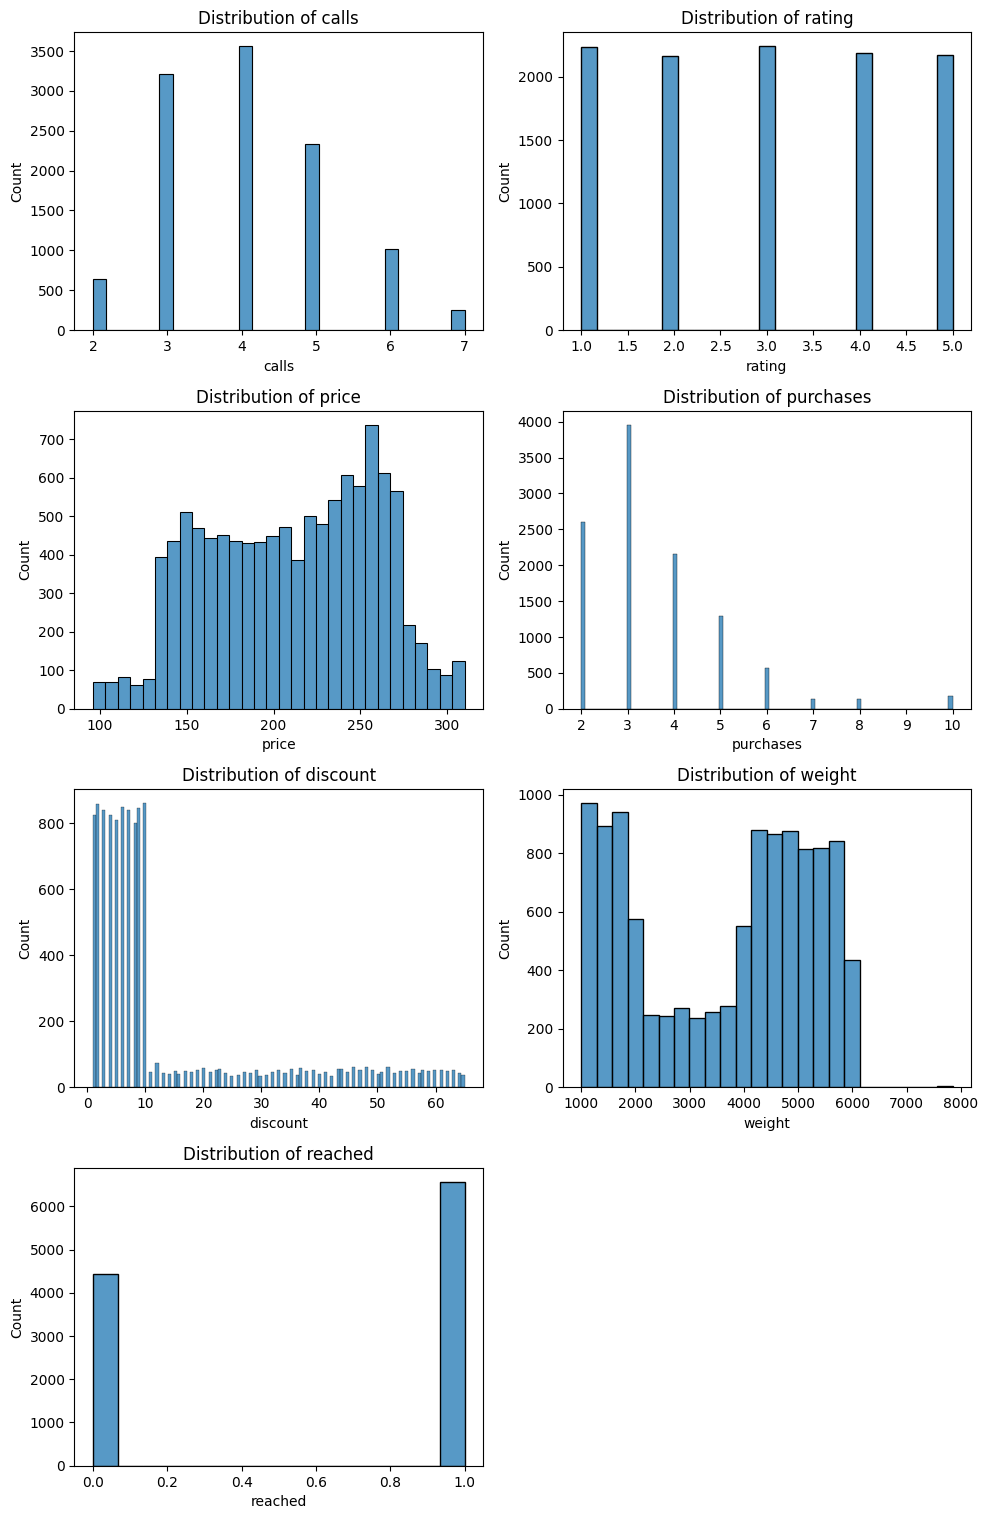

In [ ]:
# Ambil data numeric column
fig, axes = plt.subplots(8, 2 , figsize=(10,30))

# mengubah array 2D dari subplot (3 baris x 2 kolom) menjadi array 1D dengan 6 elemen.
axes = axes.flatten()

for i, column in enumerate(num_col):
  sns.histplot(data=df, x=column, ax=axes[i], palette='viridis')
  axes[i].set_title(f'Distribution of {column}', fontsize=12)

for i in range(len(num_col), 8 * 2):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show

Information:
1. Distribution of calls
  - Distribusi paling banyak terdapat pada variabel 4 dan distribusi data paling sedikit terdapat pada variabel 7
  - Distribusi data lebih banyak ditengah dengan rentang variabel 3,4, dan 5
2. Distribution of rating
  - Distribusi data rating terdistribusi dengan baik dan rata. Dengan rentang variabel 1.0 - 5.0
3. Distribution of price
  - Data terdistribusi dengan baik dengan jumlah terbesar rata ditengah.
  - Rentang data banyak tersebar pada rentang 150 - 250
4. Distribution of purchases
  - Distribusi data paling banyak tersebar pada variabel 3.0 dan paling rendah pada variabel 5.0
5. Distribution of discount
  - Distribusi data tidak rata dan lebih banyak tersebar pada bagian kiri dengan rentang variabel 0 - 10.0
  - Distribusi data terendah tersebar pada rentang 12.0 - 17.5
6. Distribution of weight
  - Data lebih banyak terdapat pada bagian sebelah kanan dengan rentang 4000 - 6000
  - Terdapat sedikit distribusi data disekitar variabel 3000
7. Distribution of reached
  - Data terdistribusi dengan baik dan memiliki jumlah yang seimbang antara variabel 0 dan 1

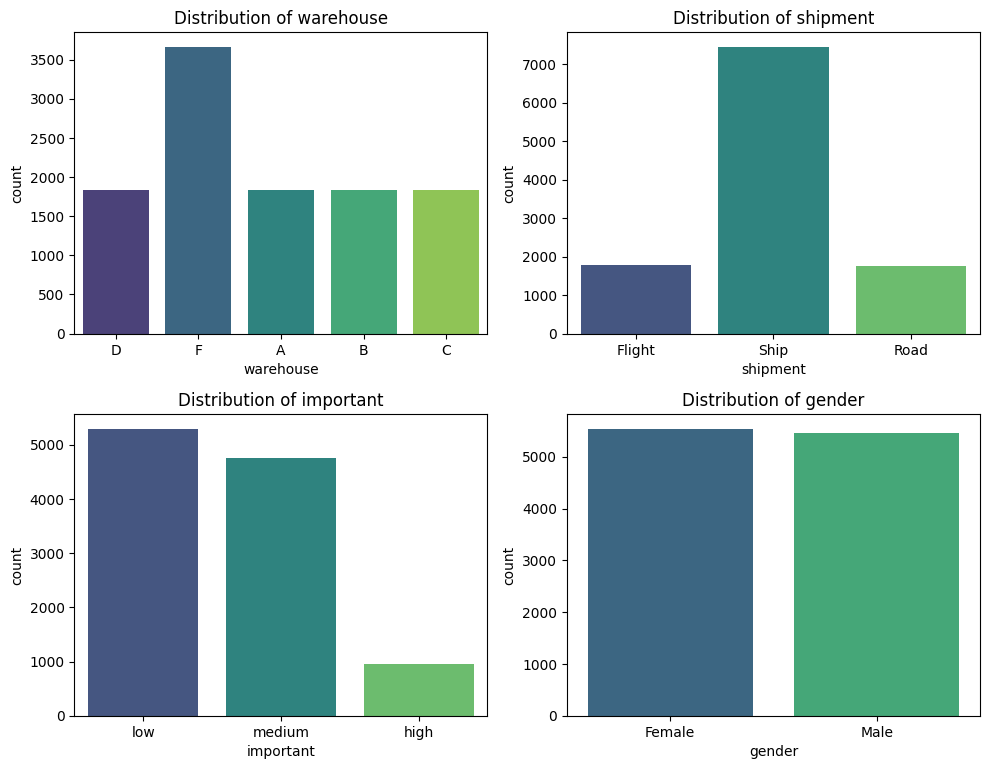

In [ ]:
# Distribution of Categorical column
plt.figure(figsize=(10,15))
for i, column in enumerate(cat_col, 1):
  plt.subplot(4, 2, i)
  sns.countplot(x=df[column], palette='viridis')
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Information:
1. Distribution of warehous
  - Data cukup terdistribusi dengan baik, akan tetapi ada peningkatakan jumlah data pada variabel F
2. Distribution of shipment
  - Data lebih banyak menyebar pada variabel ship dengan jumlah valeu data lebih dari 5000
  - Variabel flight dan road memiliki jumlah distribusi data yang seimbang namun sedikit valuenya
3. Distribution of important
  - Data dengan variabel high memiliki jumlah yang sedikit dibandingkan variabel medium dan low
  - Data lebih banyak tersebar pada varibel medium dan low
4. Distribution of gender
  - Data terdistribusi dengan baik antara variabel female dan male
  

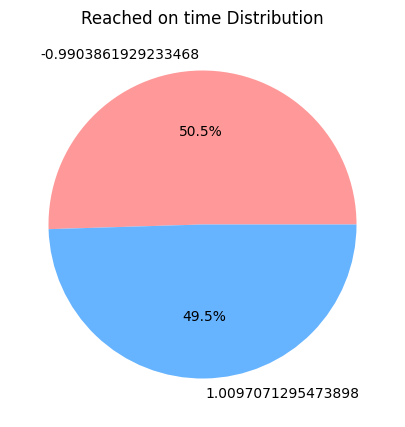

In [ ]:
# Pie Chart
ontime_counts = df['reached'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(ontime_counts, labels=ontime_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Reached on time Distribution')
plt.show()

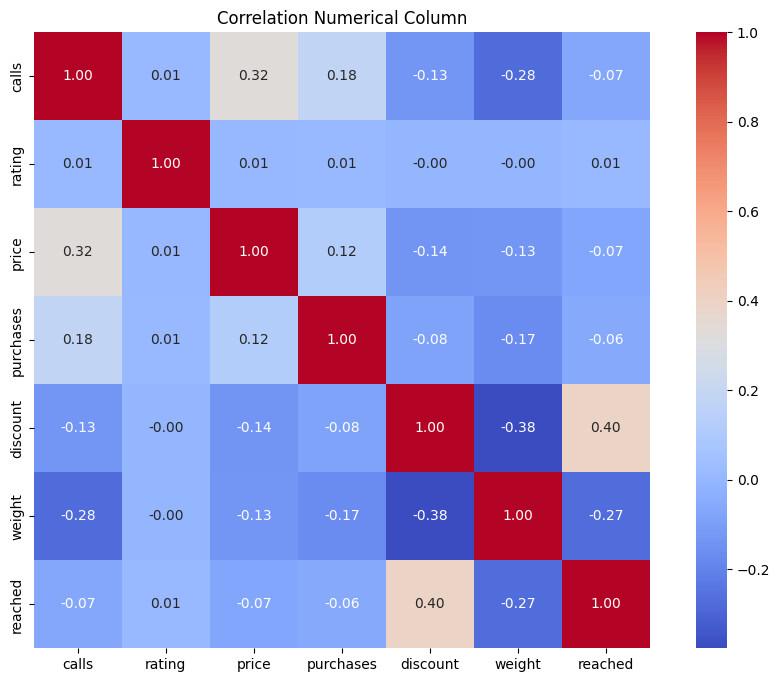

In [ ]:
# Analisis Correlation Numerical column
plt.figure(figsize=(12,8))
corr_num = df[num_col].corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Numerical Column')
plt.show()

Informasi:
- Variabel calls memiliki korelasi yang cukup kuat dengan variabel purchases sebesar 0.35 dan variabel price sebesar 0.37
- Variabel price dan purchases juga memiliki korelasi yang cukup baik dengan nilai korelasi positif sebesar 0.25
- Korelasi yang rendah ditunjukkan oleh variabel purchase dan weight dengan nilai korelasi sebesar -0.46 diikuti oleh variabel calls dan weight dengan nilai -0.42

## Data Preprocessing

In [ ]:
# Melakukan pengecekan pada nilai yang hilang (missing value)
df.isnull().sum()

,0
warehouse,0
shipment,0
calls,0
rating,0
price,0
purchases,0
important,0
gender,0
discount,0
weight,0


In [ ]:
# Cek nilai duplicate
cek_duplicate = df.duplicated().any()
print(cek_duplicate)

# True = ada, False = tidak ada

False


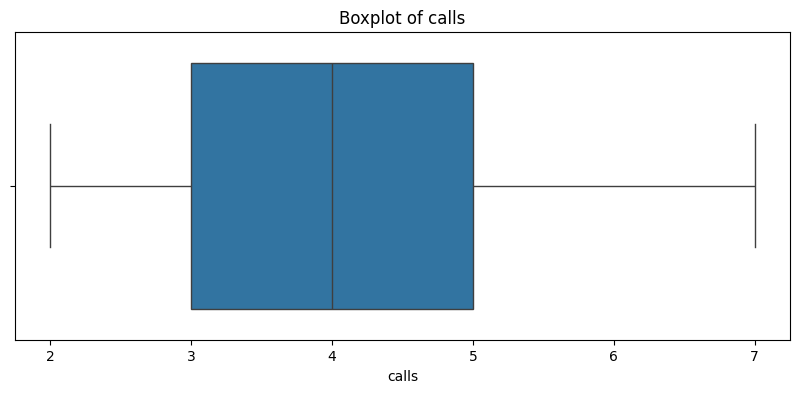

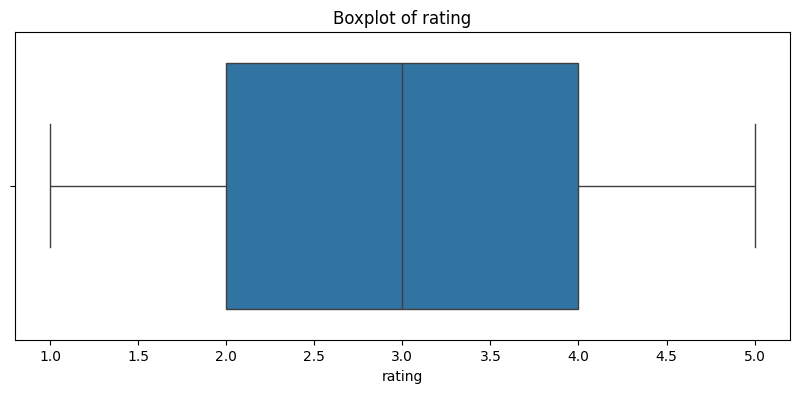

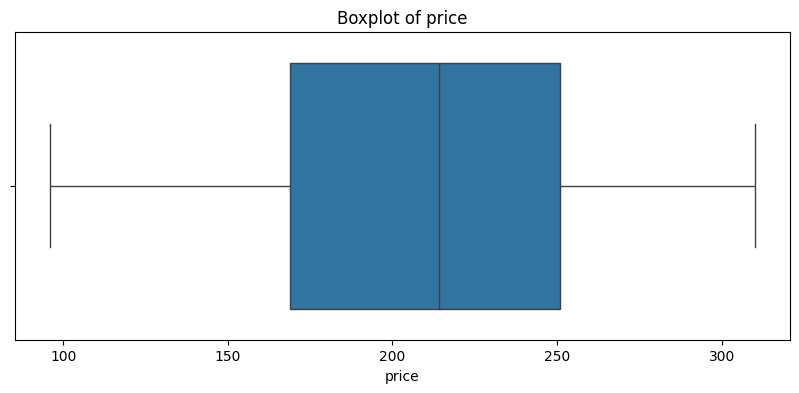

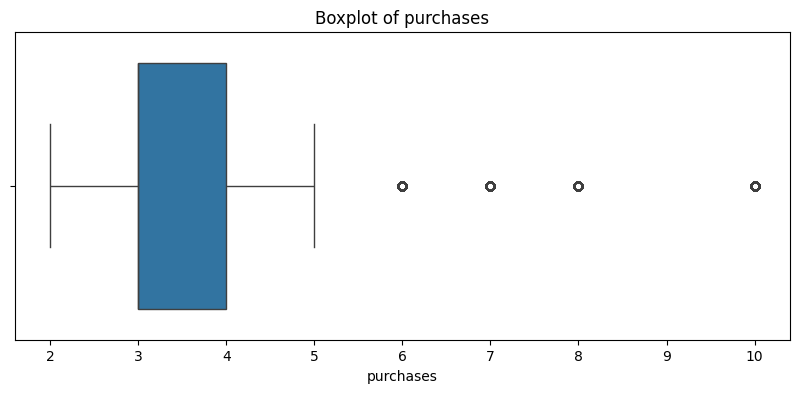

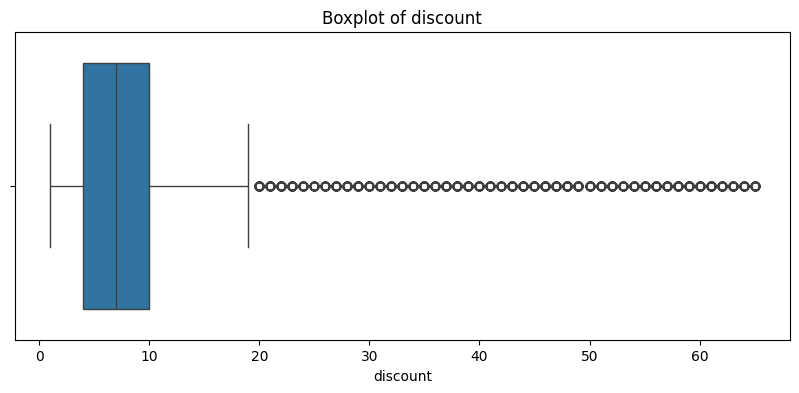

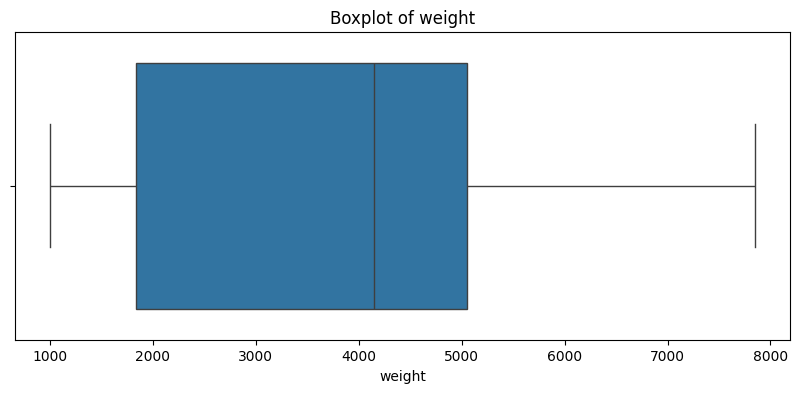

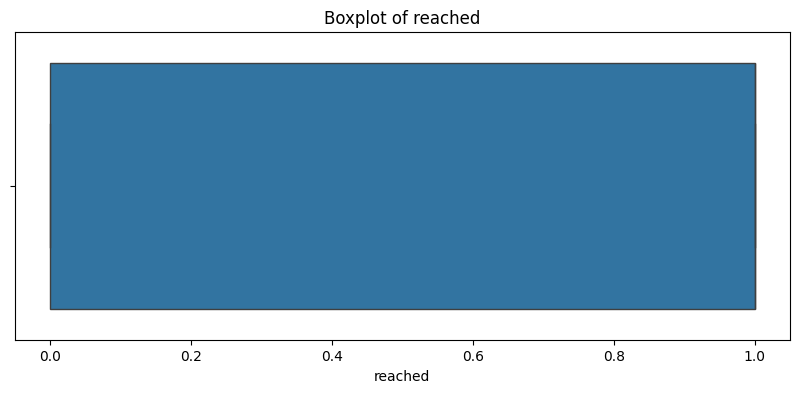

In [ ]:
for feature in num_col:
  plt.figure(figsize=(10,4))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [ ]:
# Menangani outlier

# Identifikasi outlier
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

# Mengganti outlier dengan nilai batas bawah dan atas
condition = ~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filter_num = df.loc[condition, num_col]

# Menggabungkan data dengan kategorical
df = pd.concat([df_filter_num, df.loc[condition, cat_col]], axis=1)

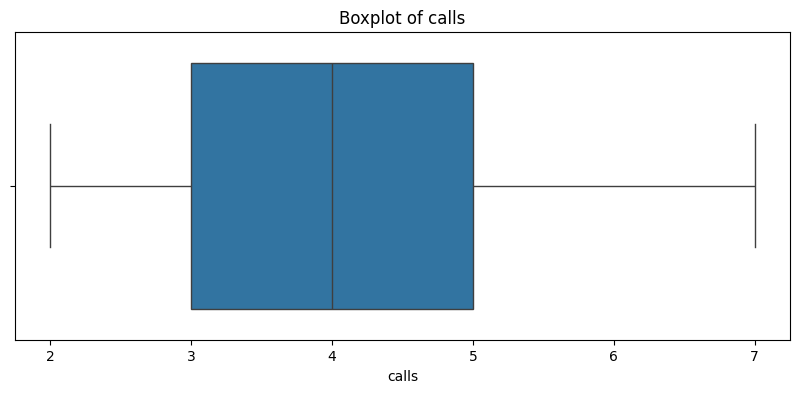

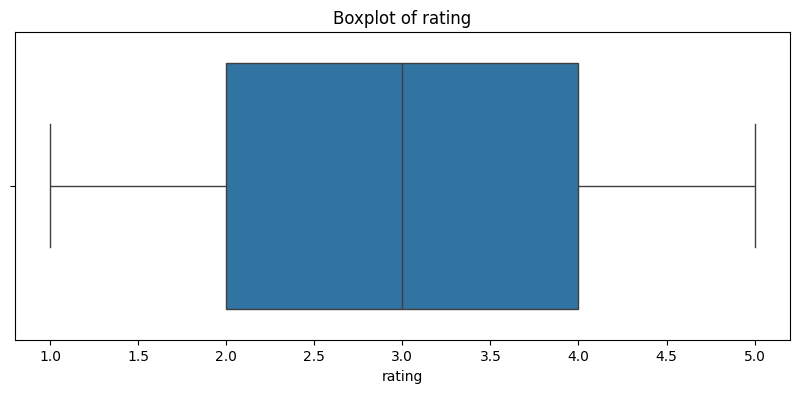

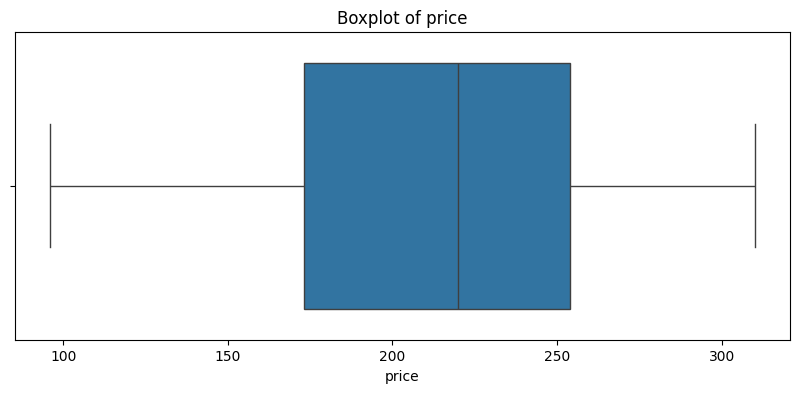

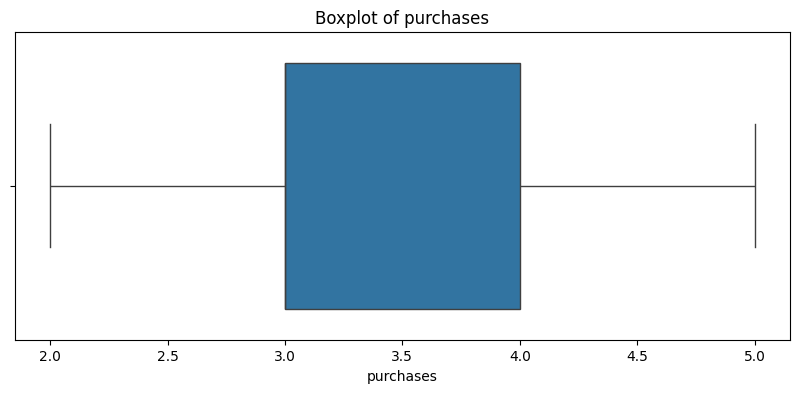

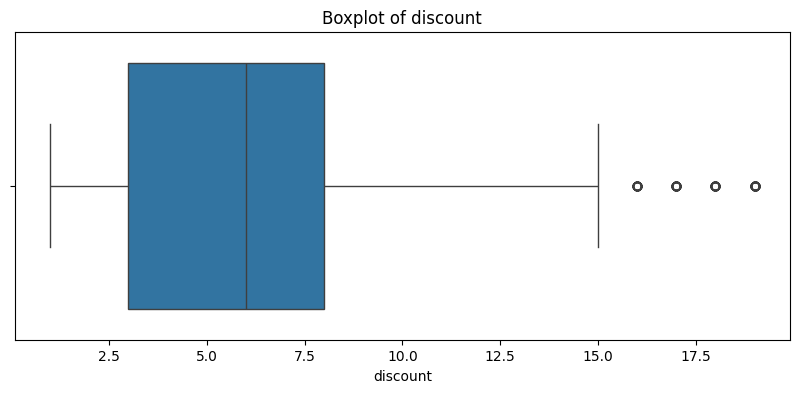

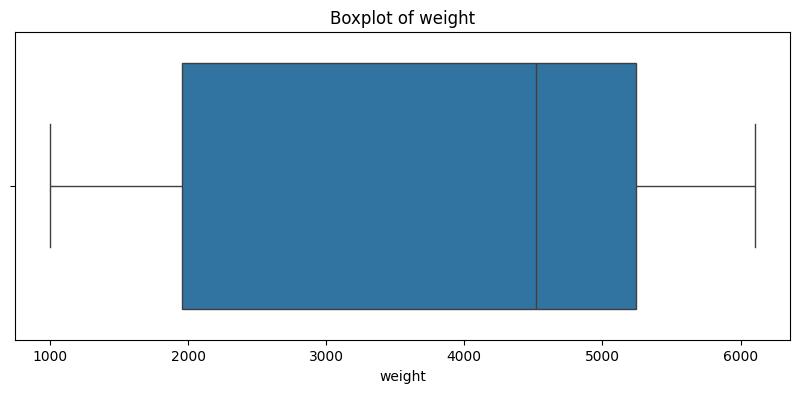

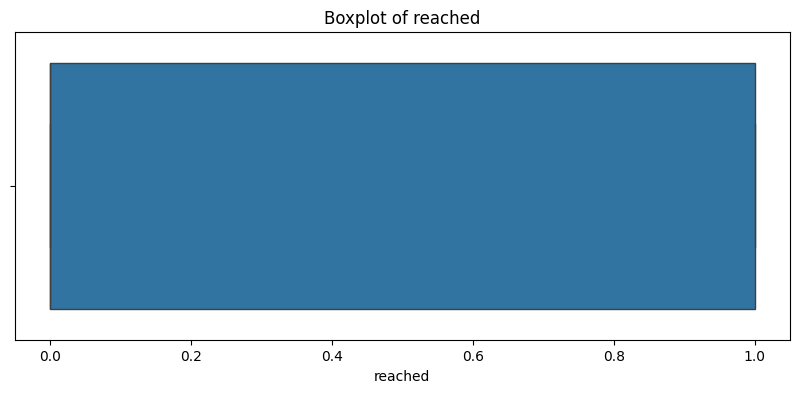

In [ ]:
for feature in num_col:
  plt.figure(figsize=(10,4))
  sns.boxplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [ ]:
# Standarisasi Fitur Numeric
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
df.head(3)

,calls,rating,price,purchases,discount,weight,reached,warehouse,shipment,important,gender
3,-0.962141,0.004527,-0.781413,0.724174,1.131258,-1.716621,1.009707,B,Flight,medium,Male
5,-0.962141,-1.410633,-1.071699,-0.284632,1.695047,-1.568407,1.009707,F,Flight,medium,Female
6,-0.962141,0.712107,0.752955,-0.284632,-0.842007,-0.979258,1.009707,D,Flight,low,Female


Mengubah value kategorical menjadi numerical menggunakan LabelEncoder

In [ ]:
df[cat_col]

,warehouse,shipment,important,gender
3,B,Flight,medium,Male
5,F,Flight,medium,Female
6,D,Flight,low,Female
8,A,Flight,low,Female
10,C,Flight,medium,Male
...,...,...,...,...
10992,D,Ship,medium,Male
10994,A,Ship,medium,Female
10995,B,Ship,medium,Female
10996,C,Ship,low,Female


In [ ]:
# Binning data untuk mengubah tipe data kategorical
oh_col = ['warehouse', 'shipment', 'gender']

# 1. One-hot Encoding
df_onehot = pd.get_dummies(df[oh_col], drop_first=True).astype(int)

# 2. Lable encode
label_encoder = LabelEncoder()
df['important'] = label_encoder.fit_transform(df['important'])

# Gabungkan hasil dari encode
df[df_onehot.columns] = df_onehot

df.drop(columns=oh_col, inplace=True)
df.head()

,calls,rating,price,purchases,discount,weight,reached,important,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Road,shipment_Ship,gender_Male
3,-0.962141,0.004527,-0.781413,0.724174,1.131258,-1.716621,1.009707,2,1,0,0,0,0,0,1
5,-0.962141,-1.410633,-1.071699,-0.284632,1.695047,-1.568407,1.009707,2,0,0,0,1,0,0,0
6,-0.962141,0.712107,0.752955,-0.284632,-0.842007,-0.979258,1.009707,1,0,0,1,0,0,0,0
8,-0.962141,0.712107,-1.320516,-0.284632,1.413152,-1.294212,1.009707,1,0,0,0,0,0,0,0
10,-0.962141,0.712107,-0.511862,-1.293438,1.695047,-0.659981,1.009707,2,0,1,0,0,0,0,1


Univariate Analysis

<Axes: >

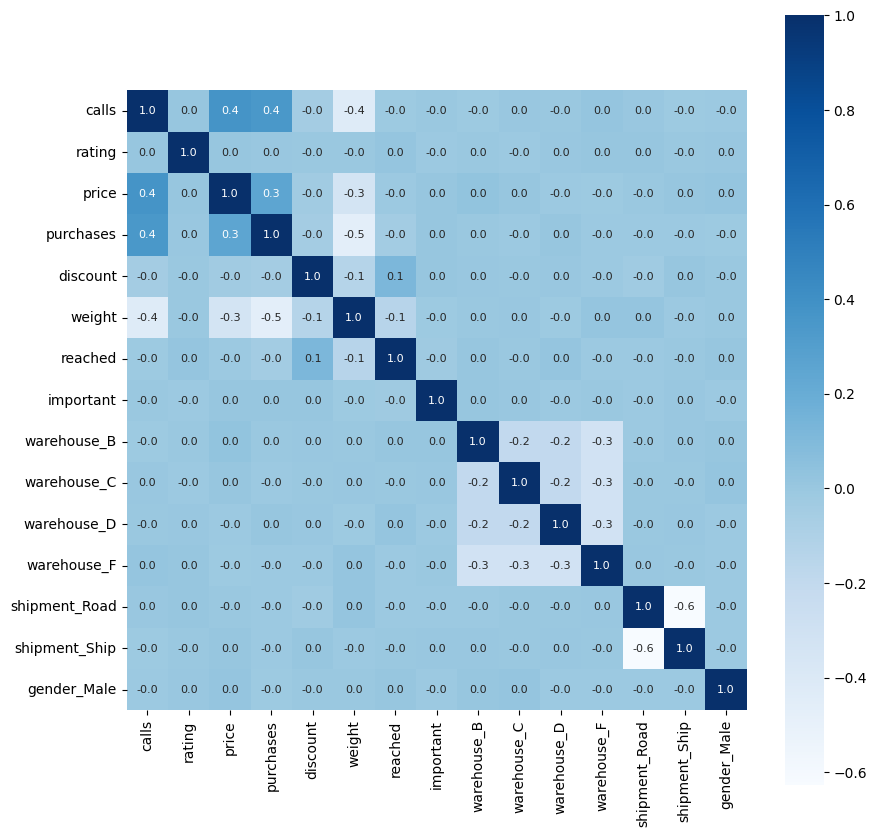

In [ ]:
# membuat variabel baru untuk meletakkan fungsi
corr = df.corr()

# membuat visualisasi korelasi dataset Shipping
plt.figure(figsize=(10,10))

# sns.heatmap(corr, annot=True,)
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


# **Decision Tree Classification**

Pemagian data K-Fold Validation

In [ ]:
# # Memisahkan fitur dengan label
X = df.drop(columns='reached') # Fitur
y = df['reached'].values # Label

# Spilt data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'Data Train: {X_train.shape}')
print(f'Data Test: {X_test.shape}')

Data Train: (6376, 14)
Data Test: (1595, 14)


In [ ]:
print(y[:10])  # Check the first 10 values of the target variable
print(y.dtype)  # Check the data type of the target variable

[1.00970713 1.00970713 1.00970713 1.00970713 1.00970713 1.00970713
 1.00970713 1.00970713 1.00970713 1.00970713]
float64


In [ ]:
# inisialisasi model Classification
models = [
  ('dt_classifier', DecisionTreeClassifier(random_state=42)),
  ('nb_classifier', GaussianNB()),
  ('knn_classifier', KNeighborsClassifier(n_neighbors=7)),
  ('rf_classifier', RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)),
  ('svm_classifier', SVC(kernel='rbf', random_state=42, gamma=0.1))
]

# Variabel menyimpan hasil model
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': []
}

for model_name, model in models:
  # Melatih model
  model.fit(X_train, y_train)

  # Prediksi dengan data uji
  y_pred = model.predict(X_test)

  # Menyimpan hasil evaluasi
  results['Model'].append(model_name)
  results['Accuracy'].append(accuracy_score(y_test, y_pred) * 100)
  results['Precision'].append(precision_score(y_test, y_pred) * 100)
  results['Recall'].append(recall_score(y_test, y_pred) * 100)
  results['F1'].append(f1_score(y_test, y_pred) * 100)

# Menampilkan hasil
results_df =  pd.DataFrame(results)
results_df

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Membuat model Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Variabel untuk menyimpan hasil evaluasi
results = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:
    # print(f"Evaluasi dengan {num_folds}-fold Cross-Validation")

    # Define KFold
    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    clf = DecisionTreeClassifier(random_state=42)

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan data uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model dengan data training
        clf.fit(X_train, y_train)

        # Prediksi menggunakan data testing
        y_pred = clf.predict(X_test)

        # Menghitung metrik evaluasi
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results['fold'].append(num_folds)
    results['accuracy'].append(mean_accuracy * 100)
    results['precision'].append(mean_precision * 100)
    results['recall'].append(mean_recall * 100)

In [ ]:
# Menampilkan hasil perbandingan
results_df_dt = pd.DataFrame(results)
results_df_dt

,fold,accuracy,precision,recall
0,2,63.787553,69.174488,70.927265
1,4,64.469351,70.239124,70.192473
2,6,64.451185,70.425331,69.682081
3,8,64.442047,70.137004,70.396645
4,10,64.532956,70.239529,70.415836


In [ ]:

# Menemukan fold dengan akurasi tertinggi
best_fold = results_df_dt.loc[results_df_dt['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi:")
print(f"Jumlah Fold: {best_fold['fold']}")
print(f"Akurasi: {best_fold['accuracy']:.2f}%")
print(f"Precision: {best_fold['precision']:.2f}%")
print(f"Recall: {best_fold['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi:
Jumlah Fold: 10.0
Akurasi: 64.53%
Precision: 70.24%
Recall: 70.42%


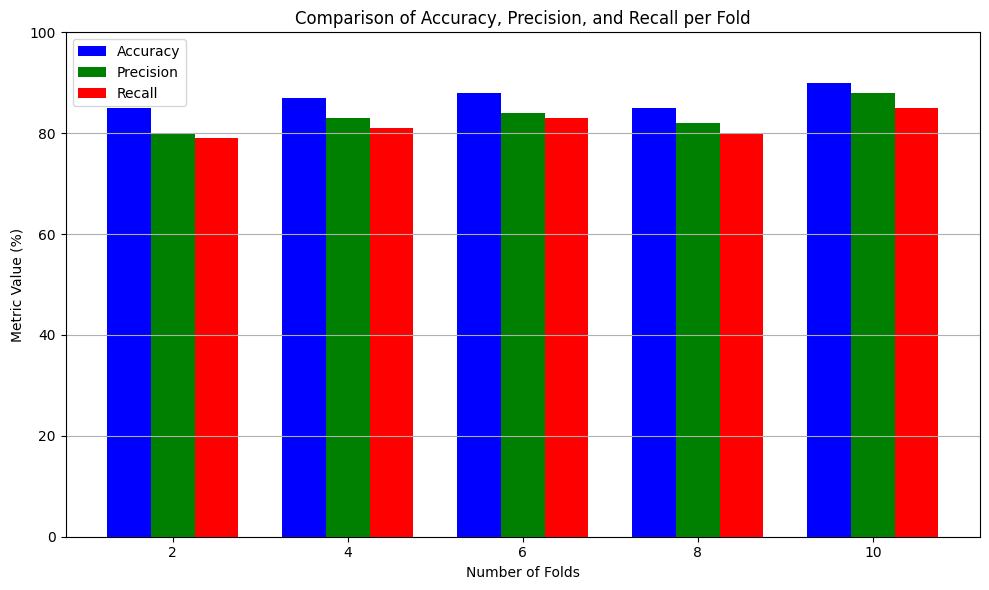

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data contoh untuk 5 algoritma dan 5 fold (k-fold: 2, 4, 6, 8, 10)
k_folds = [2, 4, 6, 8, 10]

# Misal hasil evaluasi untuk metrik Accuracy, Precision, Recall untuk Decision Tree
accuracy = [85, 87, 88, 85, 90]  # Contoh akurasi untuk setiap fold
precision = [80, 83, 84, 82, 88]  # Contoh precision untuk setiap fold
recall = [79, 81, 83, 80, 85]  # Contoh recall untuk setiap fold

# Menyusun data dalam bentuk np.array
accuracy = np.array(accuracy)
precision = np.array(precision)
recall = np.array(recall)

# Plotting untuk Accuracy, Precision, dan Recall dengan bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25  # Lebar setiap bar
index = np.arange(len(k_folds))  # Indeks k-fold (x-axis)

# Membuat bar untuk setiap metrik
bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy', color='b')
bar2 = ax.bar(index, precision, bar_width, label='Precision', color='g')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='r')

# Menambahkan label dan judul
ax.set_xlabel('Number of Folds')
ax.set_ylabel('Metric Value (%)')
ax.set_title('Comparison of Accuracy, Precision, and Recall per Fold')
ax.set_xticks(index)
ax.set_xticklabels(k_folds)
ax.set_ylim(0, 100)

# Menambahkan grid dan legend
ax.grid(True, axis='y')
ax.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


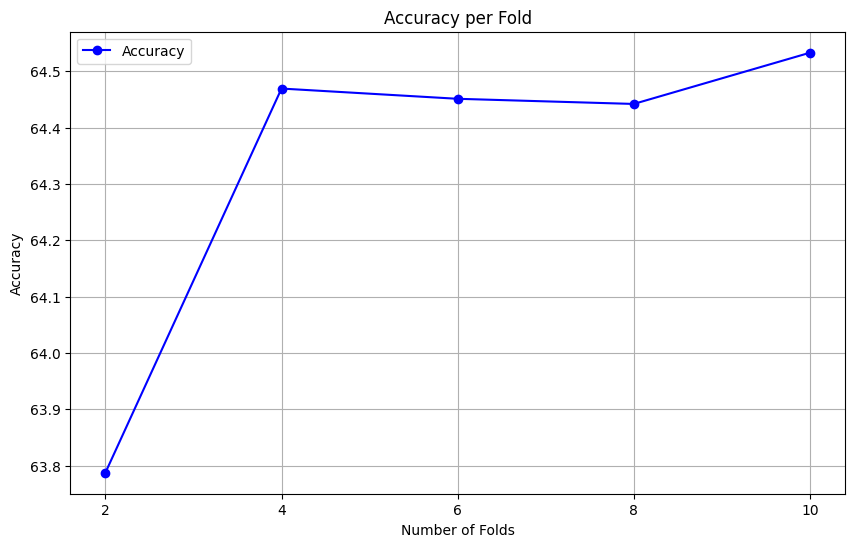

In [ ]:
# Misalnya, hasil evaluasi sudah disimpan dalam DataFrame results_df
# Jika tidak, kamu bisa menggunakan hasil DataFrame yang sudah ada dari kode sebelumnya.

# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_dt['fold'], results_df_dt['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

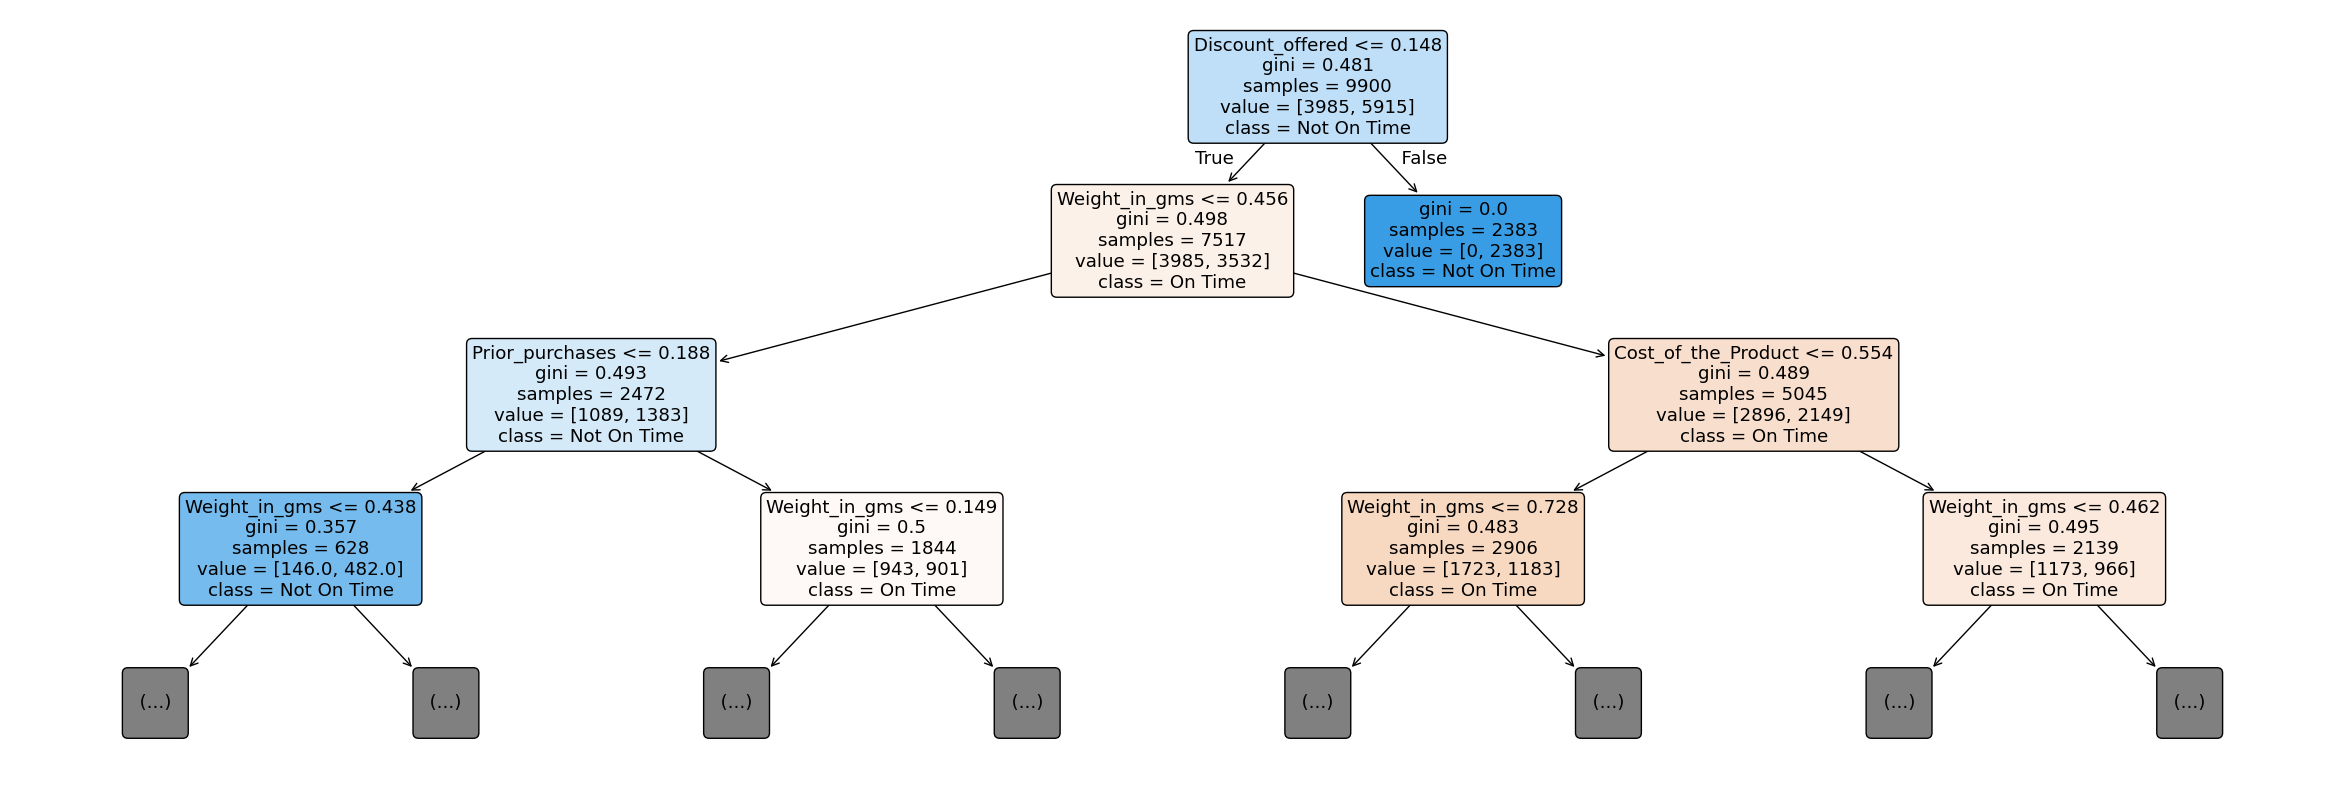

In [ ]:
# Membuat visualisasi pohon keputusan
import warnings
warnings.filterwarnings("ignore")
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))  # Ukuran lebih besar
plot_tree(clf,
          feature_names=X.columns,
          class_names=['On Time', 'Not On Time'],
          max_depth=3,
          filled=True,
          rounded=True)
# plt.figure(figsize=(5, 8))
# plot_tree(clf, feature_names=X_train.columns, class_names=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
#                                                            'Cost_of_the_Product','Discount_offered','Weight_in_gms','0.on.Time_Y.N'], filled=True, rounded=True)
plt.show()

# **Naive Bayes Classification**

Pembagian Data dengan K-Fold Validation**

In [ ]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N')
y = shipping_df['Reached_on_Time_Y_N'].values

In [ ]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

Pemodelan Algoritma NBC

In [ ]:
# Membuat model Naive Bayes
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

# Variabel untuk menyimpan hasil evaluasi
results_nbc = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Membuat model Gaussian Naive Bayes
    model_nbc = GaussianNB()

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model pada data latih
        model_nbc.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = model_nbc.predict(X_test)

        # Menyimpan hasil evaluasi untuk setiap fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results_nbc['fold'].append(num_folds)
    results_nbc['accuracy'].append(mean_accuracy * 100)
    results_nbc['precision'].append(mean_precision * 100)
    results_nbc['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_nbc = pd.DataFrame(results_nbc)

In [ ]:
# Menampilkan hasil perbandingan semua fold
print("\nHasil Evaluasi untuk Naive Bayes:")
results_df_nbc


Hasil Evaluasi untuk Naive Bayes:


,fold,accuracy,precision,recall
0,2,65.105912,97.621023,42.555774
1,4,65.142386,97.700102,42.595842
2,6,65.169577,97.700213,42.632554
3,8,65.160586,97.669476,42.640476
4,10,65.196923,97.736207,42.675388


In [ ]:
# Menemukan fold dengan akurasi tertinggi
best_fold_nbc = results_df_nbc.loc[results_df_nbc['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk Naive Bayes:")
print(f"Jumlah Fold: {best_fold_nbc['fold']}")
print(f"Akurasi: {best_fold_nbc['accuracy']:.2f}%")
print(f"Precision: {best_fold_nbc['precision']:.2f}%")
print(f"Recall: {best_fold_nbc['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk Naive Bayes:
Jumlah Fold: 10.0
Akurasi: 65.20%
Precision: 97.74%
Recall: 42.68%


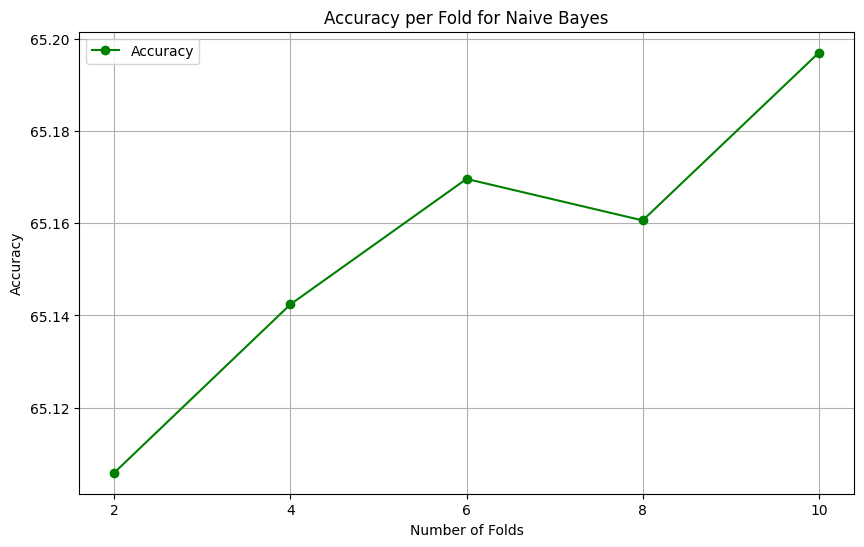

In [ ]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_nbc['fold'], results_df_nbc['accuracy'], marker='o', linestyle='-', color='g', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for Naive Bayes')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# **Pemodelan Algoritma K-NN**

**Pembagian K-Fold Validation**

In [ ]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N')
y = shipping_df['Reached_on_Time_Y_N'].values

In [ ]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

Percobaa K-NN dengan 5 fold

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

# Variabel untuk menyimpan hasil evaluasi
results_knn = {'fold': [], 'k_value': [], 'accuracy': [], 'precision': [], 'recall': []}

# Variabel untuk melacak nilai K dan fold terbaik
best_accuracy = -1
best_k = None
best_num_folds = None
best_precision = None
best_recall = None

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Melakukan uji nilai K dari 3 hingga 11 (nilai K yang lebih kecil cenderung lebih mudah overfitting)
    for k in range(3, 12, 2):  # Uji nilai K: 3, 5, 7, 9, 11
        # print(f"\nEvaluasi untuk K={k}")

        # Melakukan K-Fold Cross-Validation
        for train_index, test_index in k_folds.split(X_sc):
            # Membagi data ke dalam data latih dan uji
            X_train, X_test = X_sc[train_index], X_sc[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Melatih model dengan data latih
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Prediksi pada data uji
            y_pred = knn.predict(X_test)

            # Menyimpan hasil evaluasi untuk setiap fold
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
            recall_scores.append(recall_score(y_test, y_pred, zero_division=1))

        # Menghitung rata-rata hasil evaluasi dari semua fold
        mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
        mean_precision = sum(precision_scores) / len(precision_scores)
        mean_recall = sum(recall_scores) / len(recall_scores)

        # Cek jika model dengan kombinasi fold dan K saat ini memiliki akurasi terbaik
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_k = k
            best_num_folds = num_folds
            best_precision = mean_precision
            best_recall = mean_recall

        # Menyimpan hasil ke dalam dictionary untuk perbandingan
        results_knn['fold'].append(num_folds)
        results_knn['k_value'].append(k)
        results_knn['accuracy'].append(mean_accuracy * 100)
        results_knn['precision'].append(mean_precision * 100)
        results_knn['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_knn = pd.DataFrame(results_knn)

In [ ]:
# Menampilkan hasil perbandingan
print("Perbandingan hasil evaluasi K-NN:")
results_df_knn

Perbandingan hasil evaluasi K-NN:


,fold,k_value,accuracy,precision,recall
0,2,3,63.787626,70.684258,67.175460
1,2,5,63.692162,70.699609,66.863947
2,2,7,63.705797,70.911612,66.430102
3,2,9,63.758066,71.112697,66.137033
4,2,11,63.813079,71.318622,65.852230
5,4,3,64.187658,70.781201,68.095552
6,4,5,64.042174,70.992837,67.260427
7,4,7,64.193697,71.309050,66.997163
8,4,9,64.312642,71.613060,66.683306
9,4,11,64.385831,71.872240,66.342948


In [ ]:
# # Menemukan fold dengan akurasi tertinggi
best_fold_knn = results_df_knn.loc[results_df_knn['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk K-NN:")
print(f"Jumlah Fold: {best_fold_knn['fold']}")
print(f"Nilai K: {best_fold_knn['k_value']}")
print(f"Akurasi: {best_fold_knn['accuracy']:.2f}%")
print(f"Precision: {best_fold_knn['precision']:.2f}%")
print(f"Recall: {best_fold_knn['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk K-NN:
Jumlah Fold: 8.0
Nilai K: 11.0
Akurasi: 64.53%
Precision: 71.94%
Recall: 66.57%


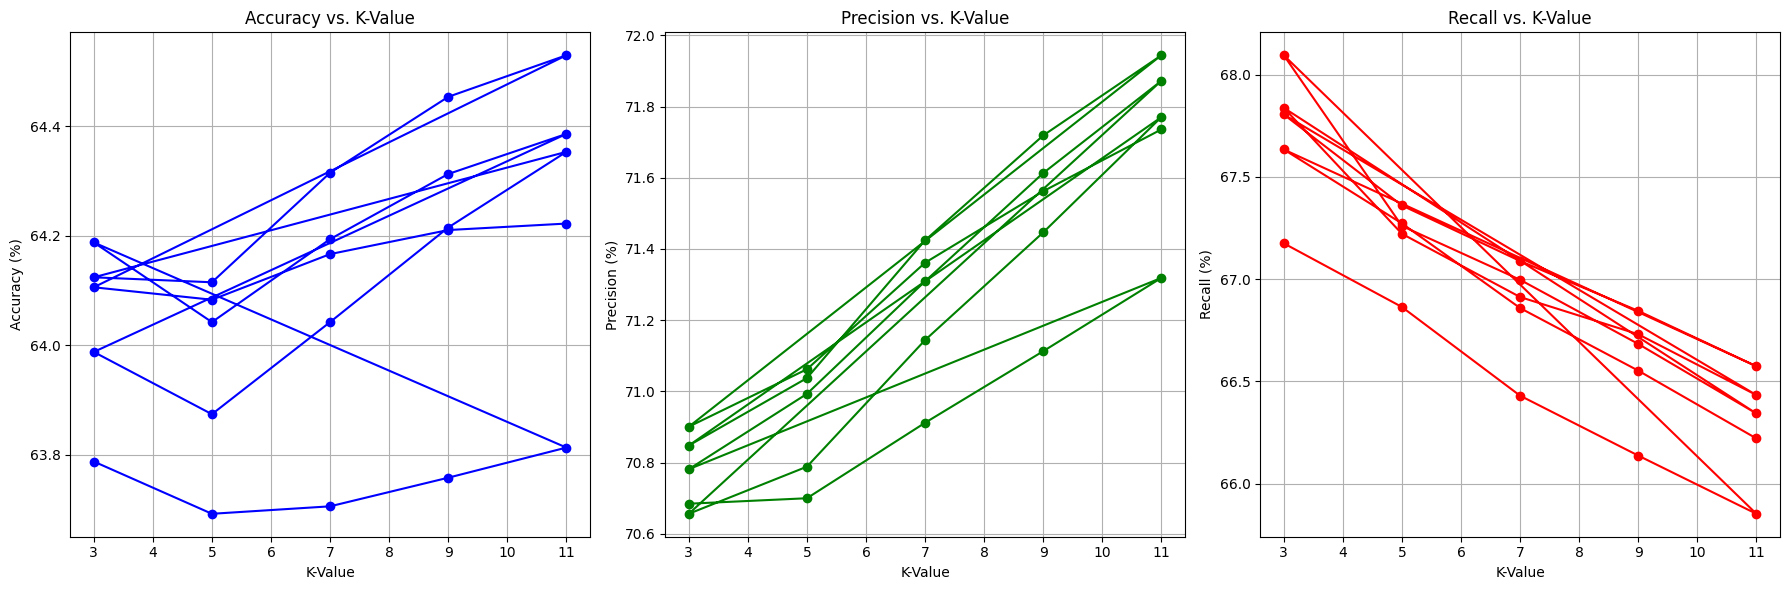

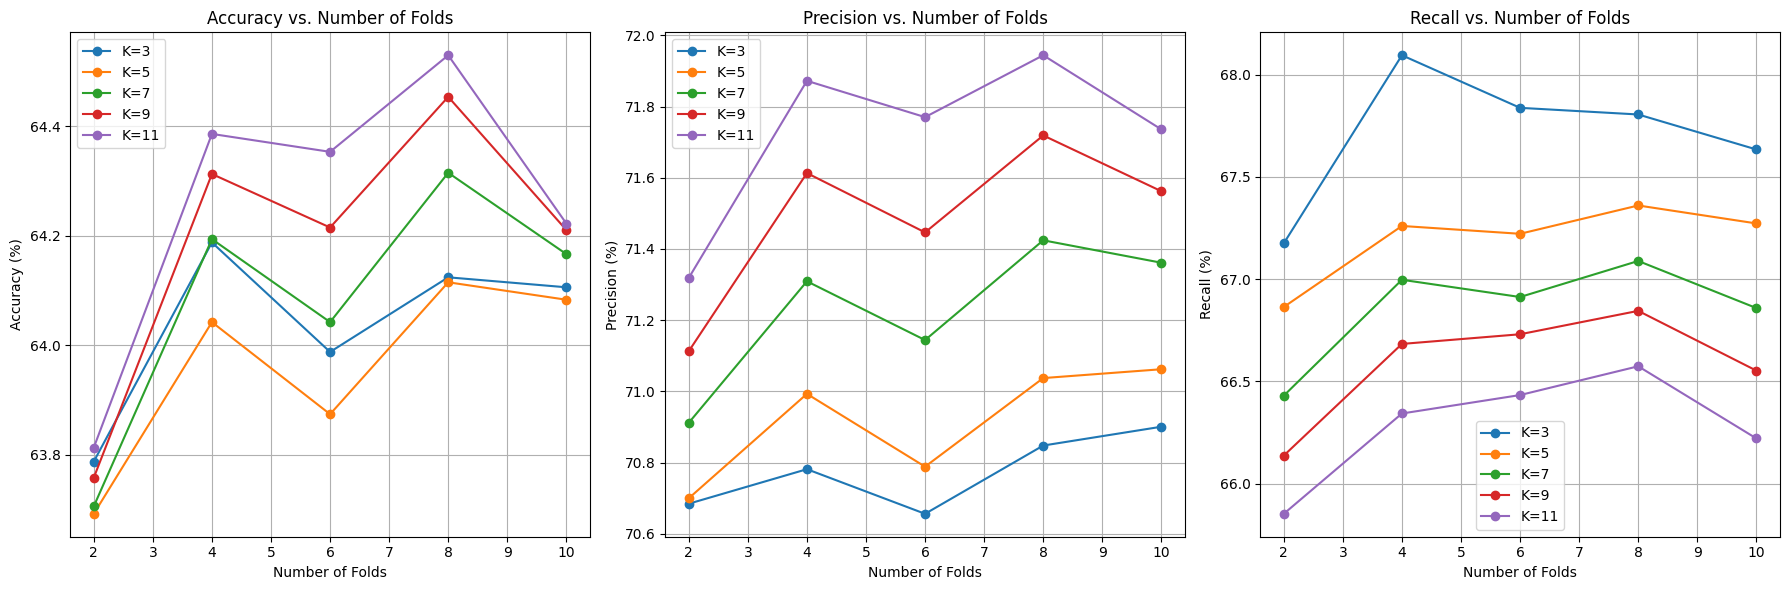

In [ ]:

# Visualisasi untuk Accuracy, Precision, dan Recall
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi Accuracy
ax[0].plot(results_df_knn['k_value'], results_df_knn['accuracy'], marker='o', linestyle='-', color='b')
ax[0].set_title('Accuracy vs. K-Value')
ax[0].set_xlabel('K-Value')
ax[0].set_ylabel('Accuracy (%)')
ax[0].grid(True)

# Visualisasi Precision
ax[1].plot(results_df_knn['k_value'], results_df_knn['precision'], marker='o', linestyle='-', color='g')
ax[1].set_title('Precision vs. K-Value')
ax[1].set_xlabel('K-Value')
ax[1].set_ylabel('Precision (%)')
ax[1].grid(True)

# Visualisasi Recall
ax[2].plot(results_df_knn['k_value'], results_df_knn['recall'], marker='o', linestyle='-', color='r')
ax[2].set_title('Recall vs. K-Value')
ax[2].set_xlabel('K-Value')
ax[2].set_ylabel('Recall (%)')
ax[2].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Visualisasi berdasarkan jumlah fold untuk setiap metrik
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy per Fold
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    ax[0].plot(data_k['fold'], data_k['accuracy'], marker='o', linestyle='-', label=f'K={k}')
ax[0].set_title('Accuracy vs. Number of Folds')
ax[0].set_xlabel('Number of Folds')
ax[0].set_ylabel('Accuracy (%)')
ax[0].legend()
ax[0].grid(True)

# Precision per Fold
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    ax[1].plot(data_k['fold'], data_k['precision'], marker='o', linestyle='-', label=f'K={k}')
ax[1].set_title('Precision vs. Number of Folds')
ax[1].set_xlabel('Number of Folds')
ax[1].set_ylabel('Precision (%)')
ax[1].legend()
ax[1].grid(True)

# Recall per Fold
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    ax[2].plot(data_k['fold'], data_k['recall'], marker='o', linestyle='-', label=f'K={k}')
ax[2].set_title('Recall vs. Number of Folds')
ax[2].set_xlabel('Number of Folds')
ax[2].set_ylabel('Recall (%)')
ax[2].legend()
ax[2].grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()


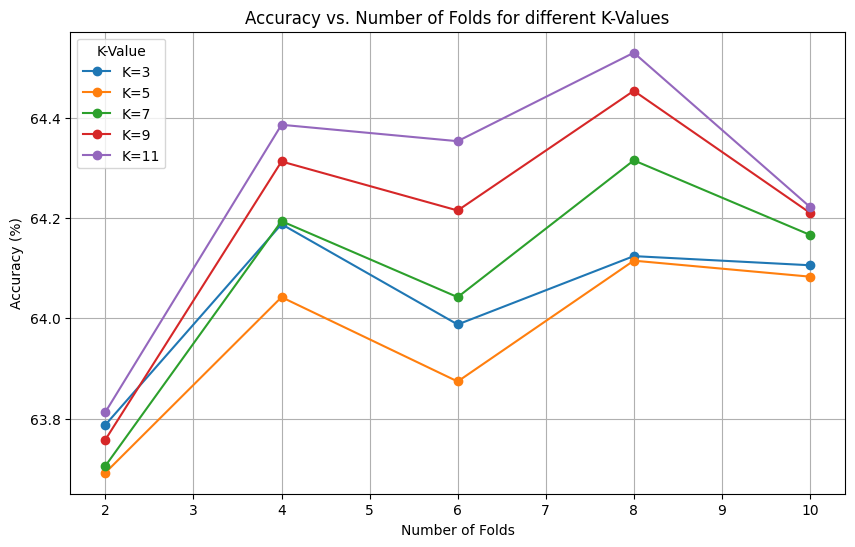

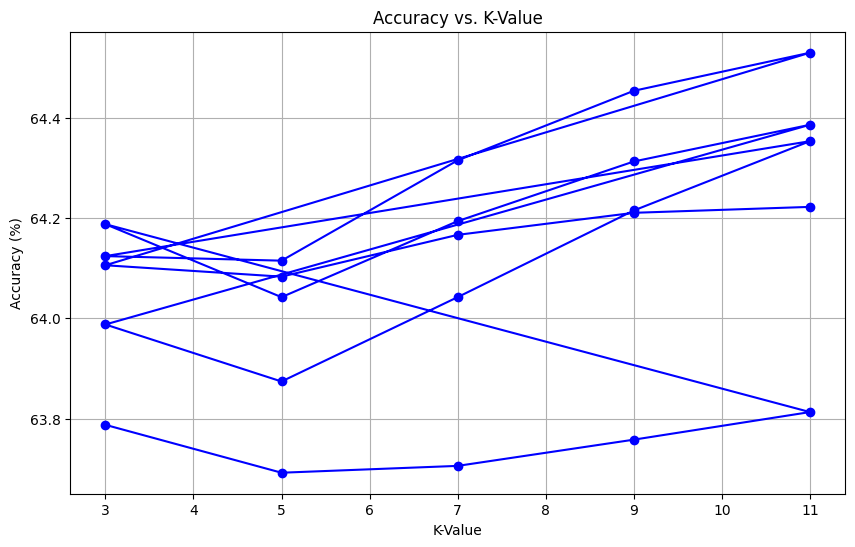

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Accuracy per K-Fold
plt.figure(figsize=(10, 6))

# Plot Accuracy per Fold untuk setiap nilai K
for k in results_df_knn['k_value'].unique():
    data_k = results_df_knn[results_df_knn['k_value'] == k]
    plt.plot(data_k['fold'], data_k['accuracy'], marker='o', linestyle='-', label=f'K={k}')

plt.title('Accuracy vs. Number of Folds for different K-Values')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy (%)')
plt.legend(title='K-Value')
plt.grid(True)
plt.show()

# Visualisasi Accuracy per K-Value
plt.figure(figsize=(10, 6))

# Plot Accuracy per K-Value
plt.plot(results_df_knn['k_value'], results_df_knn['accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


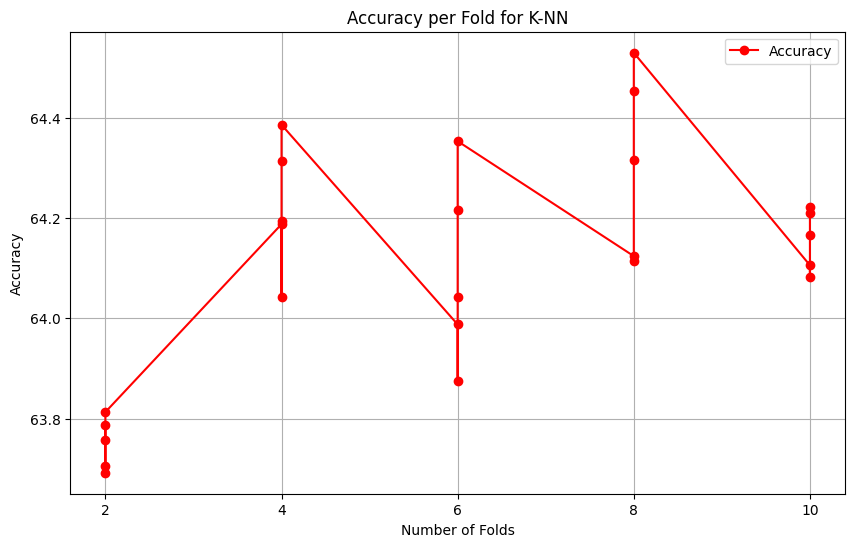

In [ ]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_knn['fold'], results_df_knn['accuracy'], marker='o', linestyle='-', color='r', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for K-NN')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# **Pembagian Data dengan K-Fold Validation**

In [ ]:
# Memisahkan fitur dengan label
X = shipping_df.drop(columns='Reached_on_Time_Y_N')
y = shipping_df['Reached_on_Time_Y_N'].values

In [ ]:
# Normalisasi dengan Min Max Normalization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X_sc = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

k_folds = KFold(n_splits=10)

# **Algoritma Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# # Membuat model
# model_rf = RandomForestClassifier(n_estimators=50, criterion='entropy', class_weight='balanced', random_state=32)

# accuracy_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='accuracy').mean()
# precision_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='precision_weighted').mean()
# recall_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='recall_weighted').mean()

# print('Average Accuracy CV Score:', round(accuracy_rf *100, 2))
# print('Average Precision CV Score:', round(precision_rf *100, 2))
# print('Average Recall CV Score:', round(recall_rf *100, 2))



In [ ]:
# accuracy_rf = cross_val_score(model_rf, X_sc, y, cv=k_folds, scoring='accuracy').mean()
# print(accuracy_rf)

0.6637738439904045


In [ ]:
# Variabel untuk menyimpan hasil evaluasi
results_rf = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Membuat model Random Forest
    model_rf = RandomForestClassifier(n_estimators=50, criterion='entropy', class_weight='balanced', random_state=32)

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model dengan data latih
        model_rf.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = model_rf.predict(X_test)

        # Menyimpan hasil evaluasi untuk setiap fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1, average='weighted'))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results_rf['fold'].append(num_folds)
    results_rf['accuracy'].append(mean_accuracy * 100)
    results_rf['precision'].append(mean_precision * 100)
    results_rf['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_rf = pd.DataFrame(results_rf)

In [ ]:
# Menampilkan hasil perbandingan semua fold
print("\nHasil Evaluasi untuk Random Forest:")
results_df_rf


Hasil Evaluasi untuk Random Forest:


,fold,accuracy,precision,recall
0,2,65.805963,67.478631,65.805963
1,4,65.796799,67.602166,65.796799
2,6,65.505873,67.301791,65.505873
3,8,66.005935,67.741447,66.005935
4,10,65.742162,67.735892,65.742162


In [ ]:
# Menemukan fold dengan akurasi tertinggi
best_fold_rf = results_df_rf.loc[results_df_rf['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk Random Forest:")
print(f"Jumlah Fold: {best_fold_rf['fold']}")
print(f"Akurasi: {best_fold_rf['accuracy']:.2f}%")
print(f"Precision: {best_fold_rf['precision']:.2f}%")
print(f"Recall: {best_fold_rf['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk Random Forest:
Jumlah Fold: 8.0
Akurasi: 66.01%
Precision: 67.74%
Recall: 66.01%


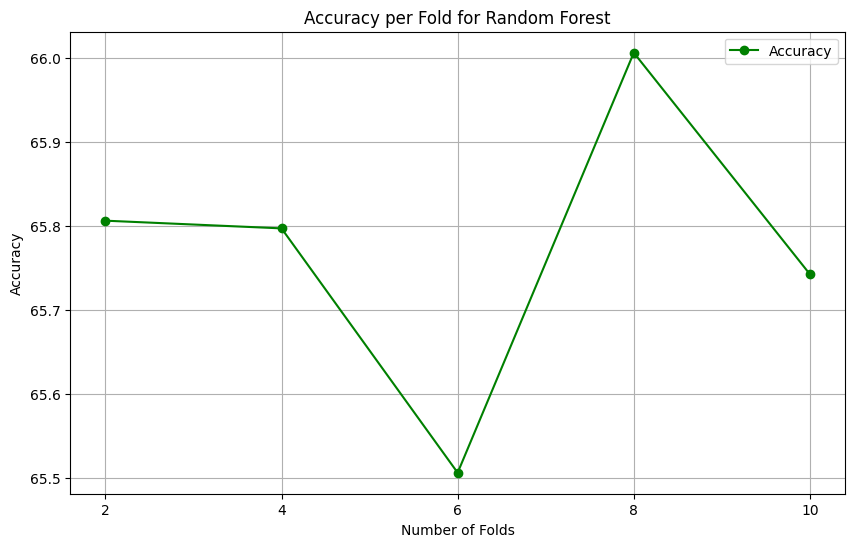

In [ ]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_rf['fold'], results_df_rf['accuracy'], marker='o', linestyle='-', color='g', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for Random Forest')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# **Algoritma SVM**

In [ ]:
from sklearn.svm import SVC

# # Membuat model SVM
# model_svm = SVC(kernel='rbf', random_state=42, gamma=0.1)

# # Evaluasi model dengan cross-validation
# accuracy_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='accuracy').mean()
# precision_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='precision_weighted').mean()
# recall_svm = cross_val_score(model_svm, X_sc, y, cv=k_folds, scoring='recall_weighted').mean()

# # Menampilkan hasil evaluasi
# print('Average Accuracy CV Score:', round(accuracy_svm * 100, 2))
# print('Average Precision CV Score:', round(precision_svm * 100, 2))
# print('Average Recall CV Score:', round(recall_svm * 100, 2))

In [ ]:
# Variabel untuk menyimpan hasil evaluasi
results_svm = {'fold': [], 'accuracy': [], 'precision': [], 'recall': []}

# Melakukan eksperimen dengan jumlah fold yang berbeda (2, 4, 6, 8, 10)
for num_folds in [2, 4, 6, 8, 10]:

    k_folds = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Menyimpan hasil metrik evaluasi untuk setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Membuat model SVM dengan kernel rbf dan gamma=0.1
    model_svm = SVC(kernel='rbf', random_state=42, gamma=0.1)

    # Melakukan K-Fold Cross-Validation
    for train_index, test_index in k_folds.split(X_sc):
        # Membagi data ke dalam data latih dan uji
        X_train, X_test = X_sc[train_index], X_sc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Melatih model dengan data latih
        model_svm.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = model_svm.predict(X_test)

        # Menyimpan hasil evaluasi untuk setiap fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1, average='weighted'))

    # Menghitung rata-rata hasil evaluasi dari semua fold
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)

    # Menyimpan hasil ke dalam dictionary untuk perbandingan
    results_svm['fold'].append(num_folds)
    results_svm['accuracy'].append(mean_accuracy * 100)
    results_svm['precision'].append(mean_precision * 100)
    results_svm['recall'].append(mean_recall * 100)

# Menyimpan hasil evaluasi ke dalam DataFrame
results_df_svm = pd.DataFrame(results_svm)

In [ ]:
# Menampilkan hasil perbandingan semua fold
print("\nHasil Evaluasi untuk SVM:")
results_df_svm


Hasil Evaluasi untuk SVM:


,fold,accuracy,precision,recall
0,2,66.315080,69.203369,66.315080
1,4,66.296994,69.279590,66.296994
2,6,66.278701,69.169902,66.278701
3,8,66.351581,69.311459,66.351581
4,10,66.278849,69.247466,66.278849


In [ ]:
# Menemukan fold dengan akurasi tertinggi
best_fold_svm = results_df_svm.loc[results_df_svm['accuracy'].idxmax()]

# Menampilkan hasil dari fold terbaik
print("\nFold Terbaik Berdasarkan Akurasi untuk SVM:")
print(f"Jumlah Fold: {best_fold_svm['fold']}")
print(f"Akurasi: {best_fold_svm['accuracy']:.2f}%")
print(f"Precision: {best_fold_svm['precision']:.2f}%")
print(f"Recall: {best_fold_svm['recall']:.2f}%")


Fold Terbaik Berdasarkan Akurasi untuk SVM:
Jumlah Fold: 8.0
Akurasi: 66.35%
Precision: 69.31%
Recall: 66.35%


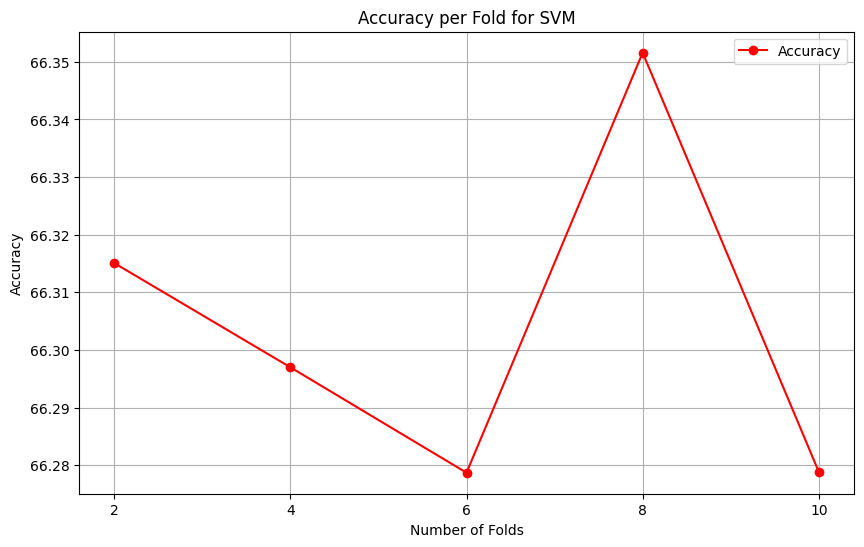

In [ ]:
# Plot accuracy per fold
plt.figure(figsize=(10, 6))
plt.plot(results_df_svm['fold'], results_df_svm['accuracy'], marker='o', linestyle='-', color='r', label='Accuracy')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold for SVM')
plt.xticks([2, 4, 6, 8, 10])  # Menyesuaikan jumlah fold yang dievaluasi
plt.legend()
plt.grid(True)
plt.show()

# Perbandingan 5 Algoritma

In [ ]:
# Mengambil hasil evaluasi dari masing-masing algoritma (hanya Accuracy, Precision, dan Recall)
# Decision Tree
acc_dt = results_df_dt[['fold', 'accuracy', 'precision', 'recall']]
acc_dt = acc_dt.rename(columns={'accuracy': 'Decision Tree Accuracy',
                                'precision': 'Decision Tree Precision',
                                'recall': 'Decision Tree Recall'})

# Naive Bayes
acc_nbc = results_df_nbc[['fold', 'accuracy', 'precision', 'recall']]
acc_nbc = acc_nbc.rename(columns={'accuracy': 'Naive Bayes Accuracy',
                                  'precision': 'Naive Bayes Precision',
                                  'recall': 'Naive Bayes Recall'})

# K-NN
acc_knn = results_df_knn[['fold', 'accuracy', 'precision', 'recall']]
acc_knn = acc_knn.rename(columns={'accuracy': 'K-NN Accuracy',
                                  'precision': 'K-NN Precision',
                                  'recall': 'K-NN Recall'})

# Random Forest
acc_rf = results_df_rf[['fold', 'accuracy', 'precision', 'recall']]
acc_rf = acc_rf.rename(columns={'accuracy': 'Random Forest Accuracy',
                                'precision': 'Random Forest Precision',
                                'recall': 'Random Forest Recall'})

# SVM
acc_svm = results_df_svm[['fold', 'accuracy', 'precision', 'recall']]
acc_svm = acc_svm.rename(columns={'accuracy': 'SVM Accuracy',
                                  'precision': 'SVM Precision',
                                  'recall': 'SVM Recall'})

# Gabungkan hasil evaluasi dari setiap algoritma
perbandingan = pd.concat([acc_dt[['Decision Tree Accuracy', 'Decision Tree Precision', 'Decision Tree Recall']],
                          acc_nbc[['Naive Bayes Accuracy', 'Naive Bayes Precision', 'Naive Bayes Recall']],
                          acc_knn[['K-NN Accuracy', 'K-NN Precision', 'K-NN Recall']],
                          acc_rf[['Random Forest Accuracy', 'Random Forest Precision', 'Random Forest Recall']],
                          acc_svm[['SVM Accuracy', 'SVM Precision', 'SVM Recall']]], axis=1)

# Menampilkan DataFrame perbandingan
result_perbandingan = pd.DataFrame(perbandingan)
result_perbandingan

,Decision Tree Accuracy,Decision Tree Precision,Decision Tree Recall,Naive Bayes Accuracy,Naive Bayes Precision,Naive Bayes Recall,K-NN Accuracy,K-NN Precision,K-NN Recall,Random Forest Accuracy,Random Forest Precision,Random Forest Recall,SVM Accuracy,SVM Precision,SVM Recall
0,63.787553,69.174488,70.927265,65.105912,97.621023,42.555774,63.787626,70.684258,67.175460,65.805963,67.478631,65.805963,66.315080,69.203369,66.315080
1,64.469351,70.239124,70.192473,65.142386,97.700102,42.595842,64.196764,73.592637,62.951112,65.796799,67.602166,65.796799,66.296994,69.279590,66.296994
2,64.451185,70.425331,69.682081,65.169577,97.700213,42.632554,64.166458,75.715341,59.696756,65.505873,67.301791,65.505873,66.278701,69.169902,66.278701
3,64.442047,70.137004,70.396645,65.160586,97.669476,42.640476,64.187658,70.781201,68.095552,66.005935,67.741447,66.005935,66.351581,69.311459,66.351581
4,64.532956,70.239529,70.415836,65.196923,97.736207,42.675388,64.637701,74.013581,63.486155,65.742162,67.735892,65.742162,66.278849,69.247466,66.278849
5,NaN,NaN,NaN,NaN,NaN,NaN,64.518000,76.025394,60.149314,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,63.987692,70.655927,67.838349,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,64.742266,74.038339,63.685144,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,64.584642,76.098826,60.220940,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,64.123998,70.847672,67.805832,NaN,NaN,NaN,NaN,NaN,NaN


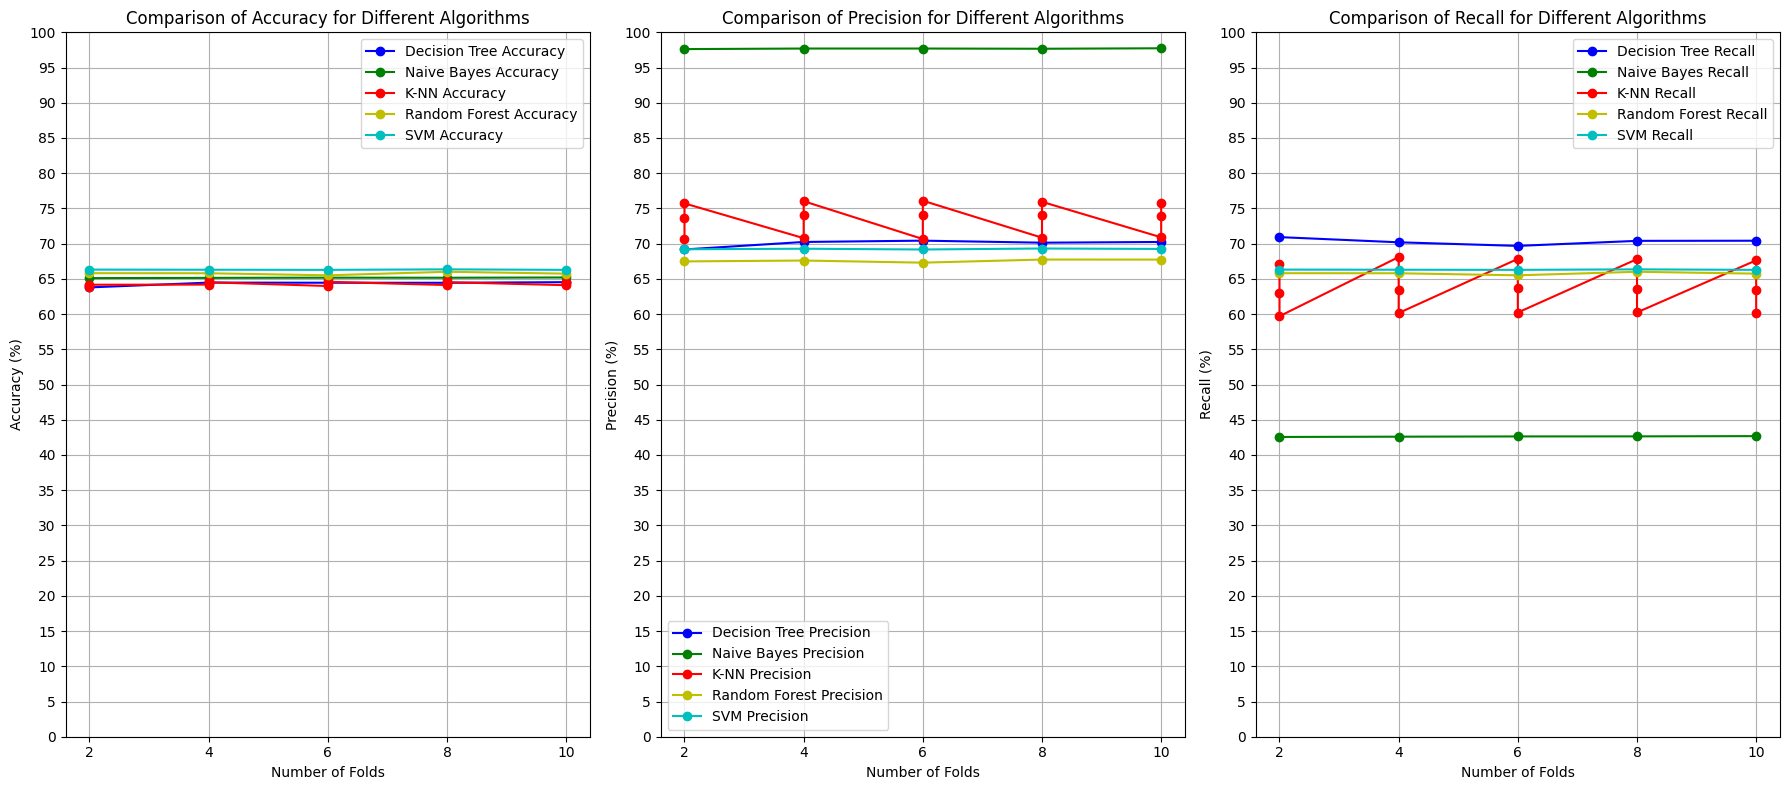

In [ ]:
import matplotlib.pyplot as plt

# Membuat figure untuk perbandingan metrik
plt.figure(figsize=(18, 8))

# Plotting untuk Accuracy
plt.subplot(131)  # 1 baris, 3 kolom, subplot pertama
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Accuracy'], linestyle='-', marker='o', color='b', label='Decision Tree Accuracy')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Accuracy'], linestyle='-', marker='o', color='g', label='Naive Bayes Accuracy')
plt.plot(acc_knn['fold'], acc_knn['K-NN Accuracy'], linestyle='-', marker='o', color='r', label='K-NN Accuracy')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Accuracy'], linestyle='-', marker='o', color='y', label='Random Forest Accuracy')
plt.plot(acc_svm['fold'], acc_svm['SVM Accuracy'], linestyle='-', marker='o', color='c', label='SVM Accuracy')

plt.title('Comparison of Accuracy for Different Algorithms')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy (%)')
plt.xticks([2, 4, 6, 8, 10])  # Menampilkan k-fold pada sumbu X
plt.yticks(range(0, 101, 5))  # Menampilkan kelipatan 5 dari 0 hingga 100 pada sumbu Y
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Precision
plt.subplot(132)  # 1 baris, 3 kolom, subplot kedua
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Precision'], linestyle='-', marker='o', color='b', label='Decision Tree Precision')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Precision'], linestyle='-', marker='o', color='g', label='Naive Bayes Precision')
plt.plot(acc_knn['fold'], acc_knn['K-NN Precision'], linestyle='-', marker='o', color='r', label='K-NN Precision')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Precision'], linestyle='-', marker='o', color='y', label='Random Forest Precision')
plt.plot(acc_svm['fold'], acc_svm['SVM Precision'], linestyle='-', marker='o', color='c', label='SVM Precision')

plt.title('Comparison of Precision for Different Algorithms')
plt.xlabel('Number of Folds')
plt.ylabel('Precision (%)')
plt.xticks([2, 4, 6, 8, 10])  # Menampilkan k-fold pada sumbu X
plt.yticks(range(0, 101, 5))  # Menampilkan kelipatan 5 dari 0 hingga 100 pada sumbu Y
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Recall
plt.subplot(133)  # 1 baris, 3 kolom, subplot ketiga
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Recall'], linestyle='-', marker='o', color='b', label='Decision Tree Recall')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Recall'], linestyle='-', marker='o', color='g', label='Naive Bayes Recall')
plt.plot(acc_knn['fold'], acc_knn['K-NN Recall'], linestyle='-', marker='o', color='r', label='K-NN Recall')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Recall'], linestyle='-', marker='o', color='y', label='Random Forest Recall')
plt.plot(acc_svm['fold'], acc_svm['SVM Recall'], linestyle='-', marker='o', color='c', label='SVM Recall')

plt.title('Comparison of Recall for Different Algorithms')
plt.xlabel('Number of Folds')
plt.ylabel('Recall (%)')
plt.xticks([2, 4, 6, 8, 10])  # Menampilkan k-fold pada sumbu X
plt.yticks(range(0, 101, 5))  # Menampilkan kelipatan 5 dari 0 hingga 100 pada sumbu Y
plt.legend(loc='best')
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


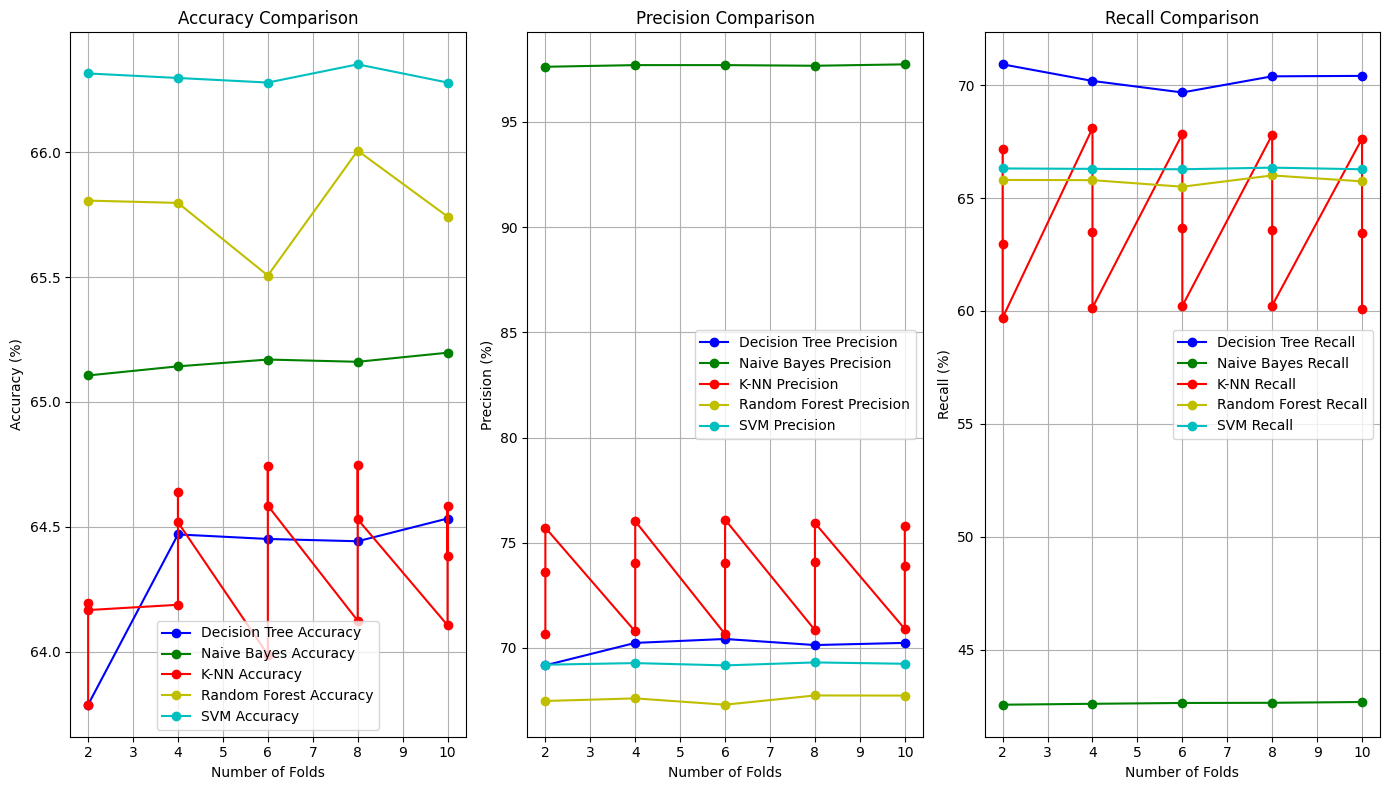

In [ ]:
# Plotting perbandingan metrik (Accuracy, Precision, Recall) untuk setiap algoritma
plt.figure(figsize=(14, 8))

# Plotting untuk Accuracy
plt.subplot(131)
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Accuracy'], marker='o', linestyle='-', color='b', label='Decision Tree Accuracy')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Accuracy'], marker='o', linestyle='-', color='g', label='Naive Bayes Accuracy')
plt.plot(acc_knn['fold'], acc_knn['K-NN Accuracy'], marker='o', linestyle='-', color='r', label='K-NN Accuracy')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Accuracy'], marker='o', linestyle='-', color='y', label='Random Forest Accuracy')
plt.plot(acc_svm['fold'], acc_svm['SVM Accuracy'], marker='o', linestyle='-', color='c', label='SVM Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy (%)')
plt.xticks(range(2, 11))
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Precision
plt.subplot(132)
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Precision'], marker='o', linestyle='-', color='b', label='Decision Tree Precision')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Precision'], marker='o', linestyle='-', color='g', label='Naive Bayes Precision')
plt.plot(acc_knn['fold'], acc_knn['K-NN Precision'], marker='o', linestyle='-', color='r', label='K-NN Precision')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Precision'], marker='o', linestyle='-', color='y', label='Random Forest Precision')
plt.plot(acc_svm['fold'], acc_svm['SVM Precision'], marker='o', linestyle='-', color='c', label='SVM Precision')
plt.title('Precision Comparison')
plt.xlabel('Number of Folds')
plt.ylabel('Precision (%)')
plt.xticks(range(2, 11))
plt.legend(loc='best')
plt.grid(True)

# Plotting untuk Recall
plt.subplot(133)
plt.plot(acc_dt['fold'], acc_dt['Decision Tree Recall'], marker='o', linestyle='-', color='b', label='Decision Tree Recall')
plt.plot(acc_nbc['fold'], acc_nbc['Naive Bayes Recall'], marker='o', linestyle='-', color='g', label='Naive Bayes Recall')
plt.plot(acc_knn['fold'], acc_knn['K-NN Recall'], marker='o', linestyle='-', color='r', label='K-NN Recall')
plt.plot(acc_rf['fold'], acc_rf['Random Forest Recall'], marker='o', linestyle='-', color='y', label='Random Forest Recall')
plt.plot(acc_svm['fold'], acc_svm['SVM Recall'], marker='o', linestyle='-', color='c', label='SVM Recall')
plt.title('Recall Comparison')
plt.xlabel('Number of Folds')
plt.ylabel('Recall (%)')
plt.xticks(range(2, 11))
plt.legend(loc='best')
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()